In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
# from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os


In [2]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
# Creating training set
# training_set = train_datagen.flow_from_directory('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/train',
training_set = train_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Training-validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Creating the Test set
# test_set = test_datagen.flow_from_directory('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/test',
test_set = test_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 720 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [4]:
training_set.class_indices

{'Chronic otitis media': 0,
 'Earwax plug': 1,
 'Myringosclerosis': 2,
 'Normal': 3}

In [5]:
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Multi_class_classification/result2.hdf5')

In [6]:
print(history.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 256)       3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       65664     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                             

In [7]:
# model.save('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [8]:
# history = load_model('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [9]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    # 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/test', # Put your path here
    'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing', # Put your path here
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# predictions = model.predict(test_set, steps=test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis = 1)

Found 160 images belonging to 4 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_24316\3805786949.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


5/5 [==============================] - 1s 180ms/step


In [10]:
predictions

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+

In [11]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 2, 1, 2,
       2, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 3, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0,
       2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int64)

In [12]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [13]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [14]:
# class_labels

In [15]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                      precision    recall  f1-score   support

Chronic otitis media       0.71      0.93      0.80        40
         Earwax plug       0.87      0.85      0.86        40
    Myringosclerosis       0.88      0.70      0.78        40
              Normal       0.78      0.72      0.75        40

            accuracy                           0.80       160
           macro avg       0.81      0.80      0.80       160
        weighted avg       0.81      0.80      0.80       160



In [16]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [17]:
class_labels

['Chronic otitis media', 'Earwax plug', 'Myringosclerosis', 'Normal']

<Axes: >

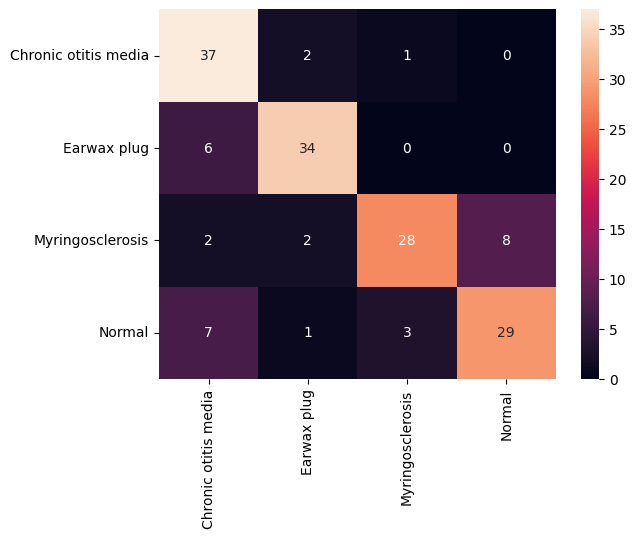

In [18]:
from sklearn.metrics import confusion_matrix
# y_prded_labels = predicted_classes
# y_test = true_classes
# plt.figure(figsize(16 , 9))
import seaborn as sns
cm = confusion_matrix(true_classes , predicted_classes)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels = class_labels)

C:\Users\Dell\AppData\Local\Temp\ipykernel_992\2192336106.py:98: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


5/5 [==============================] - 1s 198ms/step


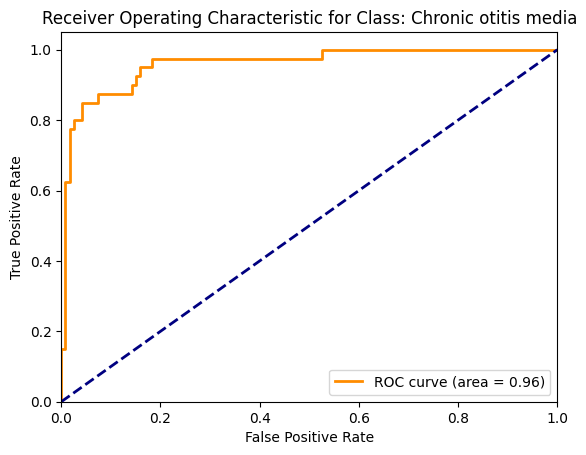

In [36]:
# dir_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/test'
# dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing/Chronic otitis media'
dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Testing'

# img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# plt.imshow(img)

# for i in os.listdir(dir_path):
#   img = image.load_img(dir_path+'//'+i, target_size=(64,64))
#   plt.imshow(img)
#   plt.show()

#   X = image.img_to_array(img)
#   X = np.expand_dims(X , axis = 0)
#   images = np.vstack([X])
#   val = history.predict(images)
#   print(i)
#   if val == 0:
#     print("abnormal")
#   else:
#     print("normal")


    
#     import os
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.preprocessing import image
# from keras.models import load_model

# # Load the Keras model
# model = load_model('path_to_your_model.h5')

# # Specify the directory containing the images
# dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing/Chronic otitis media'

# Iterate through the images in the directory










 
# for i in os.listdir(dir_path):
#     if i.endswith('.jpg') or i.endswith('.png'):  # Ensure the file is an image
#         img = image.load_img(os.path.join(dir_path, i), target_size=(64, 64))
#         plt.imshow(img)
#         plt.show()

#         X = image.img_to_array(img)
#         X = np.expand_dims(X, axis=0)
#         images = np.vstack([X])
#         val = history.predict(images)
#         print(i)
#         if val[0][0] > val[0][1]:  # Assuming a binary classification, adjust accordingly
#             print("abnormal")
#         else:
#             print("normal")










# ROC Curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Rest of your code...

# Calculate test_steps_per_epoch
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Predictions
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)

# Rest of your code...

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the class you want to create the ROC curve for
positive_class = 'Chronic otitis media'
positive_class_index = class_labels.index(positive_class)

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Multi_class_classification/result2.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# Compute ROC curve and ROC area for the specific class
fpr, tpr, _ = roc_curve(true_classes_bin[:, positive_class_index], predictions[:, positive_class_index])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class: {}'.format(positive_class))
plt.legend(loc="lower right")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_992\3002862357.py:24: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


5/5 [==============================] - 1s 188ms/step


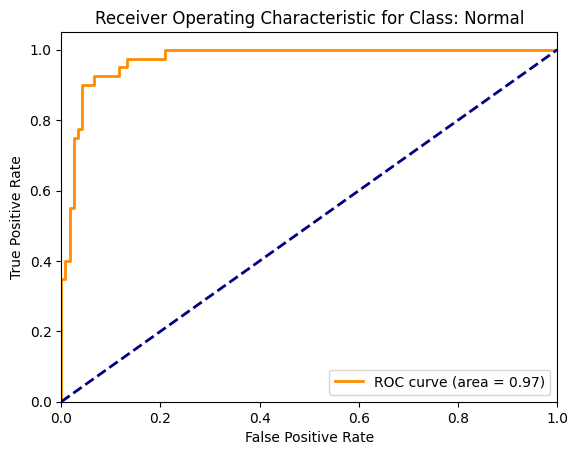

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Rest of your code...

# Calculate test_steps_per_epoch
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Predictions
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)

# Rest of your code...

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the class you want to create the ROC curve for
positive_class = 'Normal'
positive_class_index = class_labels.index(positive_class)

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Multi_class_classification/result2.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# Compute ROC curve and ROC area for the specific class
fpr, tpr, _ = roc_curve(true_classes_bin[:, positive_class_index], predictions[:, positive_class_index])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class: {}'.format(positive_class))
plt.legend(loc="lower right")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_992\895055860.py:24: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


5/5 [==============================] - 1s 191ms/step


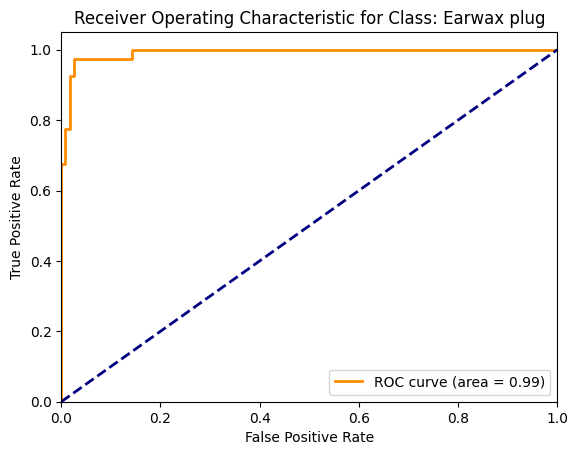

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Rest of your code...

# Calculate test_steps_per_epoch
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Predictions
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)

# Rest of your code...

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the class you want to create the ROC curve for
positive_class = 'Earwax plug'
positive_class_index = class_labels.index(positive_class)

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Multi_class_classification/result2.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# Compute ROC curve and ROC area for the specific class
fpr, tpr, _ = roc_curve(true_classes_bin[:, positive_class_index], predictions[:, positive_class_index])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class: {}'.format(positive_class))
plt.legend(loc="lower right")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_992\4096840142.py:24: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


5/5 [==============================] - 1s 187ms/step


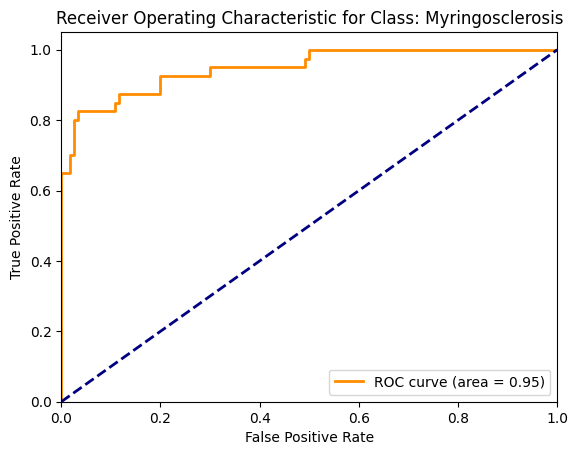

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Rest of your code...

# Calculate test_steps_per_epoch
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Predictions
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)

# Rest of your code...

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the class you want to create the ROC curve for
positive_class = 'Myringosclerosis'
positive_class_index = class_labels.index(positive_class)

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Multi_class_classification/result2.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# Compute ROC curve and ROC area for the specific class
fpr, tpr, _ = roc_curve(true_classes_bin[:, positive_class_index], predictions[:, positive_class_index])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class: {}'.format(positive_class))
plt.legend(loc="lower right")
plt.show()
